In [65]:
from matplotlib import pyplot as plt
from math import *
import numpy as np
import pandas as pd

from scipy.stats import poisson, norm


In [66]:
df = pd.read_csv('/Users/mac/Downloads/data_lab.csv')
mean = df.mean(axis=0)[0]

df['poiss'] = np.random.poisson(mean, 4000)
df

/var/folders/dj/l90ly3ws2mg3f0yln9n029_r0000gn/T/ipykernel_104/3961284628.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean = df.mean(axis=0)[0]


,Значение,poiss
0,1,0
1,2,0
2,1,3
3,1,3
4,0,1
...,...,...
3995,1,0
3996,2,3
3997,0,1
3998,2,0


<Axes: ylabel='Frequency'>

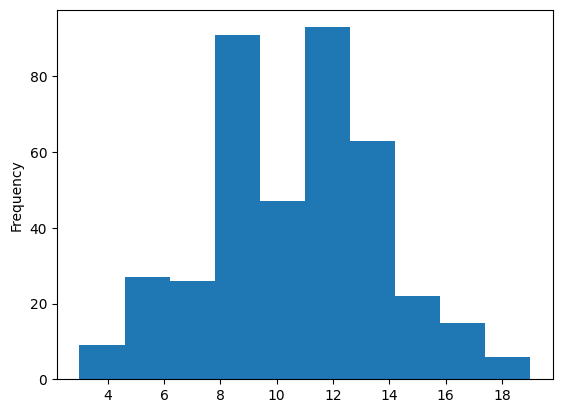

In [ ]:
t_10 = 10
by = t_10
win = t_10
start = 0
df_r_10 = df.rolling(win).sum()[start::by]
df_r_10['Значение'].plot.hist()



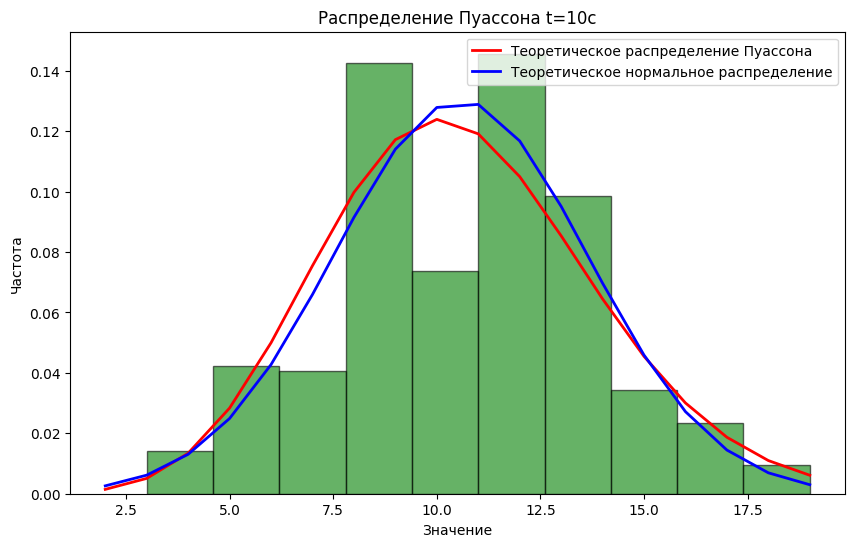

mu, sigma, sigma_n: 10.573934837092732 3.0652735301826826 0.15326367650913414 3.2517587298403203


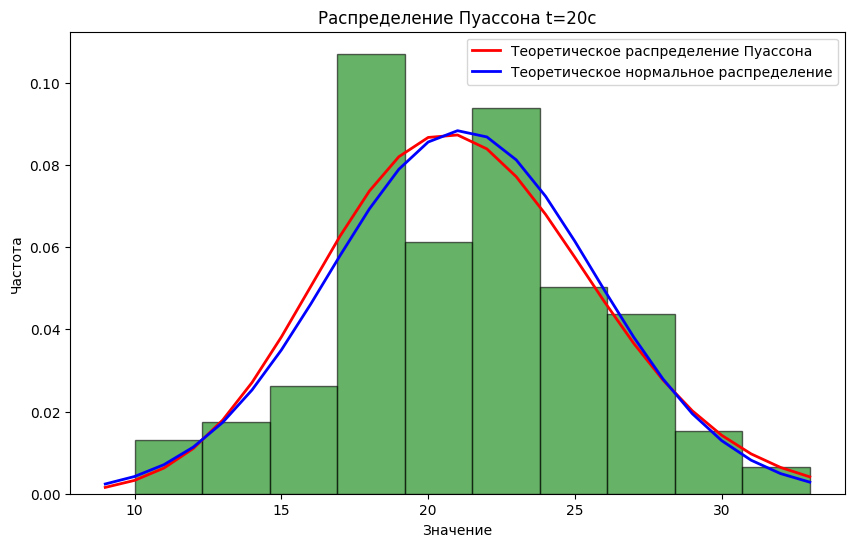

mu, sigma, sigma_n: 21.14572864321608 4.514160586950966 0.31919935623980733 4.598448503921304


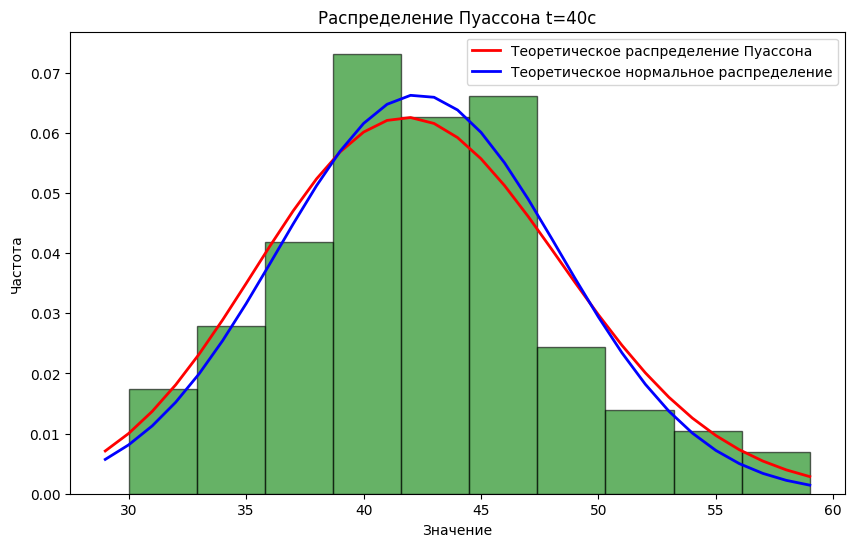

mu, sigma, sigma_n: 42.323232323232325 6.014995348070678 0.6014995348070677 6.5056308167027375


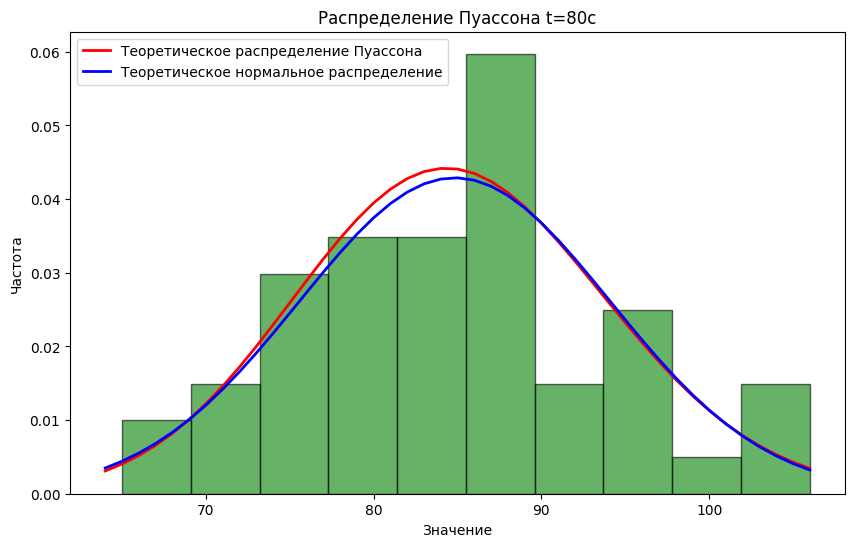

mu, sigma, sigma_n: 84.83673469387755 9.301314734074584 1.3154045444828975 9.210685897037068


In [ ]:
def draw_pl(t, df):
    by = t
    win = t
    start = 0
    df_r_10 = df.rolling(win).sum()[start::by]

    mu = df_r_10['Значение'].mean()
    sigma = df_r_10['Значение'].std()
    
    # freq hist
    plt.figure(figsize=(10, 6))
    df_r_10['Значение'].hist(density=True, alpha=0.6, color='g', edgecolor='black')

    x = np.arange(df_r_10['Значение'].min()-1, df_r_10['Значение'].max() + 1)
    pmf = poisson.pmf(x, mu)
    pdf = norm.pdf(x, mu, sigma)
    
    pmf /= pmf.sum()  #norm

    #theor
    plt.plot(x, pmf, 'r-', lw=2, label=f'Теоретическое распределение Пуассона')
    plt.plot(x, pdf, 'b-', lw=2, label='Теоретическое нормальное распределение')
    plt.title(f'Распределение Пуассона t={t}c')
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.grid()
    plt.legend()
    plt.show()
    sigma_n = sigma/sqrt(len(df_r_10['Значение']))
    print("mu, sigma, sigma_n:", mu, sigma, sigma_n, sqrt(mu))

draw_pl(10, df)
draw_pl(20, df)
draw_pl(40, df)
draw_pl(80, df)